# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
# !git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
# !pip install -e .

C:\Users\CP1\Desktop\GLE-Billing\ultralytics


# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('configuration/config-GLE-row.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Desktop\GLE-Billing


{'path': 'C:/Users/CP1/Desktop/GLE-Billing/configuration/Row',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['Row']}

In [4]:
# Define number of classes based on YAML
with open('configuration/config-GLE-row.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Desktop\GLE-Billing


# 3 Train YOLOv8

In [6]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='configuration/config-GLE-row.yaml', epochs=1000, workers=1, imgsz=416)  # train the model

New https://pypi.org/project/ultralytics/8.2.68 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.62  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=configuration/config-GLE-row.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, a

train: Scanning configuration\Row\obj_train_data... 290 images, 0 backgrounds, 22 corrupt: 100%|██████████| 290/290 [00:01<00:00, 289.27it/s]

train: WARNING  configuration\Row\obj_train_data\GLE_Row_00110.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0263       1.025      1.0237      1.0226       1.022      1.0244      1.0257      1.0282      1.0217]
train: WARNING  configuration\Row\obj_train_data\GLE_Row_00111.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0308       1.034      1.0336       1.033      1.0313      1.0345       1.034      1.0358      1.0261]
train: WARNING  configuration\Row\obj_train_data\GLE_Row_00154.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0033]
train: WARNING  configuration\Row\obj_train_data\GLE_Row_00155.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0024]
train: WARNING  configuration\Row\obj_train_data\GLE_Row_00156.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0046]
train: WARNING  configuratio

train: New cache created: configuration\Row\obj_train_data.cache


val: Scanning configuration\Row\obj_train_data... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 213.37it/s]

val: New cache created: configuration\Row\obj_train_data.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 1 dataloader workers
Logging results to runs\detect\train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      1.81G      4.907      3.735       3.61        399        416: 100%|██████████| 17/17 [00:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125     0.0262      0.072     0.0181    0.00451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      1.84G      3.002      1.637      1.869        441        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.255      0.416      0.246     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      1.85G      2.119      1.245        1.5        478        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.325      0.376       0.34      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      1.85G      1.937      1.154      1.401        436        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.516      0.384      0.367      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      1.86G      1.824      1.143      1.318        364        416: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.521      0.384      0.379      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      1.85G      1.724      1.111      1.282        403        416: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.292      0.416      0.286     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      1.84G      1.643      1.099      1.235        432        416: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.313      0.448      0.296      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      1.85G      1.598      1.061      1.196        384        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.377      0.384      0.313      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      1.85G      1.564      1.044      1.147        400        416: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.52      0.384      0.442      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      1.84G      1.522      1.033      1.135        507        416: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all         10        125      0.544      0.448      0.512      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      1.85G      1.462      1.015      1.127        371        416: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.53       0.44      0.417      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      1.85G      1.514      1.048      1.111        405        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all         10        125      0.611      0.496      0.614      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      1.86G      1.445       1.02       1.07        404        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.58       0.52      0.572      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      1.85G      1.413     0.9904      1.046        401        416: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.73      0.416      0.585      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      1.85G      1.325     0.9487       1.03        377        416: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.646       0.56      0.648      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      1.86G        1.3     0.9422     0.9998        420        416: 100%|██████████| 17/17 [00:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.765      0.584      0.721      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      1.85G       1.29     0.9532     0.9876        291        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.697      0.568      0.701      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      1.85G      1.233     0.9231      0.976        398        416: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all         10        125      0.652      0.552      0.654      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      1.86G      1.249     0.9134       0.97        362        416: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.644        0.6      0.691      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      1.85G      1.247      0.907     0.9674        315        416: 100%|██████████| 17/17 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.632      0.672      0.727       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      1.85G      1.204     0.8906     0.9485        396        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.586      0.645       0.67      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      1.85G      1.195     0.8839     0.9317        456        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.755      0.752      0.787      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      1.84G      1.181     0.8696     0.9388        455        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all         10        125      0.791      0.568      0.736      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      1.85G      1.172     0.8598     0.9287        454        416: 100%|██████████| 17/17 [00:07<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.674      0.662      0.721      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      1.85G      1.176     0.8805     0.9229        396        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.804      0.704      0.759      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      1.85G      1.154     0.8505     0.9136        431        416: 100%|██████████| 17/17 [00:06<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         10        125      0.762      0.768      0.796       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      1.85G      1.156     0.8476     0.9111        431        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.691      0.664      0.728      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      1.85G      1.184     0.8391     0.9107        382        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125       0.73       0.64       0.74      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      1.86G      1.154     0.8402     0.9057        368        416: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.766       0.68      0.787      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      1.84G      1.119     0.8249     0.9074        439        416: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]

                   all         10        125      0.806      0.736      0.823      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      1.84G       1.12     0.8184     0.8972        492        416: 100%|██████████| 17/17 [00:07<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10        125      0.745      0.632      0.763      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      1.86G      1.103     0.8015     0.8977        413        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.76       0.68      0.773      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      1.86G      1.132     0.8177     0.9022        392        416: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.865      0.696      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      1.86G      1.108     0.8231     0.8933        413        416: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]

                   all         10        125      0.718      0.696      0.784      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      1.85G      1.127     0.8156     0.8865        414        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.842       0.76      0.817      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      1.85G      1.101     0.8025     0.8848        460        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.851      0.768      0.855      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      1.83G      1.081     0.7872     0.8779        361        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.869      0.798      0.854      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      1.85G      1.068     0.7787     0.8835        433        416: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.873      0.744      0.846      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      1.84G       1.07     0.7835     0.8769        397        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         10        125      0.889      0.696      0.838      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      1.86G      1.074     0.7858     0.8732        371        416: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.822      0.728      0.813      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      1.85G      1.057     0.7744     0.8738        426        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.735      0.696       0.76      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      1.85G      1.063     0.7751     0.8855        419        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.802      0.664       0.78      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      1.86G      1.081     0.7942     0.8758        406        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all         10        125      0.859      0.683       0.83      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      1.84G      1.053     0.7864     0.8773        492        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.81       0.72      0.828      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      1.85G      1.069     0.7774     0.8679        447        416: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.824      0.672      0.798       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      1.86G      1.049     0.7594     0.8682        368        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.05it/s]

                   all         10        125      0.884      0.688      0.836      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      1.85G      1.037     0.7624     0.8665        408        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.866      0.773      0.867      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      1.85G      1.025     0.7499     0.8645        365        416: 100%|██████████| 17/17 [00:07<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all         10        125      0.919      0.736      0.853      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      1.85G      1.011     0.7497      0.864        337        416: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.947      0.711      0.843       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      1.85G      1.085     0.7631     0.8554        378        416: 100%|██████████| 17/17 [00:07<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.864      0.728      0.855      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      1.86G       1.05     0.7367     0.8659        386        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all         10        125      0.876      0.744      0.835      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      1.85G      1.032      0.733     0.8773        408        416: 100%|██████████| 17/17 [00:07<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.91it/s]

                   all         10        125      0.826      0.796      0.836      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      1.85G      1.048     0.7454     0.8706        421        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all         10        125      0.783      0.692      0.808      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      1.85G      1.042       0.75     0.8646        402        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all         10        125      0.829      0.775      0.847      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      1.85G      1.011     0.7301     0.8658        370        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.789      0.712      0.836      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      1.86G      1.028     0.7479     0.8588        349        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.934      0.728      0.855      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      1.83G     0.9879     0.7199     0.8544        431        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all         10        125      0.895      0.768      0.855      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      1.85G     0.9987     0.7193     0.8552        474        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.936      0.703      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      1.85G       1.02     0.7402     0.8546        386        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         10        125      0.865      0.728      0.853      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      1.85G     0.9818     0.7194     0.8517        334        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all         10        125      0.847       0.72       0.82      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      1.85G     0.9936     0.7062      0.849        453        416: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         10        125      0.916      0.776      0.892      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      1.84G     0.9604     0.6889     0.8499        483        416: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.881      0.752      0.871      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      1.83G     0.9628     0.7016     0.8513        364        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         10        125      0.876      0.776      0.865      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      1.85G     0.9999     0.7087     0.8505        532        416: 100%|██████████| 17/17 [00:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.911      0.744      0.873      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      1.85G      1.044     0.7389     0.8558        377        416: 100%|██████████| 17/17 [00:07<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all         10        125        0.9      0.791      0.883      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      1.85G      1.032     0.7407     0.8703        352        416: 100%|██████████| 17/17 [00:06<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.817      0.832      0.863      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      1.84G      1.015      0.714      0.855        415        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.919       0.76      0.881      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      1.85G     0.9671     0.6855      0.855        384        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.904      0.751      0.855      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      1.86G     0.9537     0.6828     0.8461        360        416: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.93      0.748      0.865      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      1.83G      1.025     0.7186     0.8478        437        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.899      0.712      0.844      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      1.85G     0.9797     0.6961      0.847        433        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.867      0.732      0.846      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      1.83G     0.9406     0.6735     0.8483        405        416: 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.915      0.768      0.881      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      1.86G      1.011     0.7105     0.8504        356        416: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.01it/s]

                   all         10        125      0.894      0.739      0.868      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      1.86G     0.9576     0.6991     0.8479        412        416: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.854        0.8      0.878      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      1.81G     0.9813     0.6931     0.8538        491        416: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all         10        125      0.795      0.736      0.773      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      1.85G     0.9926     0.7023     0.8471        360        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.855      0.805      0.887      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      1.85G     0.9519     0.6861     0.8474        361        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.886      0.752      0.847      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      1.85G     0.9212     0.6778     0.8517        470        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all         10        125      0.873      0.767       0.86      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      1.85G     0.9962     0.7213     0.8472        407        416: 100%|██████████| 17/17 [00:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all         10        125      0.879        0.8      0.881      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      1.86G     0.9528     0.6908     0.8402        481        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.894       0.76      0.854      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      1.85G     0.9582     0.6912      0.852        360        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.937      0.696      0.849      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      1.85G      0.958     0.6862     0.8545        480        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.949      0.776      0.882      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      1.86G     0.9374     0.6799     0.8527        420        416: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.901      0.802      0.894      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      1.86G     0.9486     0.6716      0.863        432        416: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.886      0.776      0.861      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      1.85G     0.9164     0.6569     0.8588        357        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.868      0.808      0.874      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      1.84G     0.9846     0.6753     0.8575        399        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.927      0.752      0.883      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      1.86G     0.9791     0.6753     0.8575        405        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.882      0.808      0.877      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      1.85G     0.9343     0.6721     0.8461        439        416: 100%|██████████| 17/17 [00:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.942      0.776      0.892      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      1.85G     0.9255     0.6667     0.8655        410        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.928      0.784       0.88      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      1.85G     0.9971     0.6779     0.8823        470        416: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.908       0.79      0.887      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      1.86G     0.9747     0.6771     0.8741        350        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.97       0.78      0.903      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      1.84G     0.9631     0.6725     0.8688        465        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.957      0.744      0.858      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      1.85G      1.001     0.7111     0.8669        338        416: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.932      0.774      0.874      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      1.85G     0.9507     0.6839     0.8537        380        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.918      0.718      0.868      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      1.86G     0.9726     0.6807     0.8473        434        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125      0.934       0.76      0.873      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      1.85G     0.9429     0.6729     0.8519        429        416: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]

                   all         10        125      0.916      0.783      0.887      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      1.85G     0.9332     0.6703     0.8422        418        416: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.899        0.8      0.874      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      1.85G     0.9264     0.6499     0.8417        422        416: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.928      0.848      0.909      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      1.85G     0.9188     0.6497     0.8371        460        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]

                   all         10        125      0.895      0.792       0.89      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      1.86G     0.9122      0.643     0.8384        381        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

                   all         10        125      0.903      0.776      0.891      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      1.85G     0.9255     0.6693     0.8375        391        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all         10        125      0.941       0.76      0.883      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      1.85G     0.9065     0.6451     0.8408        409        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.951      0.784      0.902      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      1.86G     0.8964     0.6377     0.8377        408        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.786      0.816      0.865      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      1.86G     0.9068     0.6512     0.8347        386        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.25it/s]

                   all         10        125      0.925        0.8      0.894       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      1.85G     0.9176     0.6528     0.8341        393        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

                   all         10        125       0.95        0.8      0.898      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      1.85G     0.9057     0.6401     0.8284        491        416: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.19it/s]

                   all         10        125      0.969      0.753      0.895      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      1.86G     0.9154     0.6531     0.8366        388        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.85      0.816      0.887      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      1.85G     0.8784     0.6347     0.8294        491        416: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.909      0.784      0.901      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      1.85G     0.9234     0.6379     0.8386        407        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.15it/s]

                   all         10        125      0.899      0.856      0.896       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      1.85G     0.8876     0.6277     0.8313        340        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.92      0.825      0.903       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      1.85G     0.9076      0.644     0.8407        398        416: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all         10        125      0.933        0.8      0.902      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      1.85G      0.903     0.6406     0.8347        341        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]

                   all         10        125      0.863      0.792      0.897      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      1.85G     0.9012     0.6272     0.8265        394        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.918      0.776      0.899      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      1.84G     0.9046     0.6327     0.8285        471        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.946      0.836      0.924      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      1.84G     0.9141     0.6302     0.8359        432        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.878      0.808      0.898      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      1.84G     0.8976     0.6266     0.8299        459        416: 100%|██████████| 17/17 [00:06<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.911      0.792      0.896      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      1.86G     0.8903     0.6235     0.8325        374        416: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.916      0.824       0.91      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      1.84G     0.8803     0.6152     0.8316        478        416: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]

                   all         10        125      0.934      0.808      0.901      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      1.85G     0.8894     0.6211     0.8331        426        416: 100%|██████████| 17/17 [00:06<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.963      0.752       0.89      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      1.86G     0.8548     0.6066     0.8316        427        416: 100%|██████████| 17/17 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.918       0.76      0.885      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      1.85G     0.9146     0.6355     0.8339        453        416: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.986      0.784      0.908      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      1.85G     0.9061     0.6209     0.8319        398        416: 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.971      0.803      0.905      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      1.84G     0.8881     0.6111     0.8304        413        416: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.98      0.798      0.905      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      1.86G     0.9007     0.6204     0.8315        407        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.979      0.808      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      1.85G      0.882     0.6171     0.8261        355        416: 100%|██████████| 17/17 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.939      0.824      0.906      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      1.85G     0.8892     0.6172     0.8301        360        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125       0.93      0.856      0.914      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      1.85G     0.8508      0.589     0.8367        433        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.98      0.799      0.905      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      1.85G     0.8697     0.5902     0.8303        412        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         10        125      0.907      0.848      0.915      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      1.85G     0.8492     0.5927     0.8296        318        416: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.955        0.8      0.912      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      1.85G     0.8503     0.5936     0.8338        449        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.89      0.888      0.913      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      1.86G      0.852     0.6036     0.8325        378        416: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all         10        125      0.946      0.784      0.892      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      1.84G     0.8577     0.5953     0.8312        442        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.925      0.832      0.897       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      1.86G     0.8563       0.59      0.829        362        416: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all         10        125      0.914      0.852      0.906      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      1.85G     0.8613     0.6033     0.8314        453        416: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.889      0.835      0.915      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      1.85G     0.8657     0.5948     0.8324        363        416: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.838      0.856      0.909      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      1.85G     0.8762     0.6141     0.8294        431        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]

                   all         10        125      0.917      0.794      0.907      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      1.86G     0.8783     0.6231      0.826        397        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         10        125      0.897      0.837      0.914      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      1.85G     0.8683     0.6027     0.8291        407        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all         10        125       0.95        0.8      0.913      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      1.86G     0.8686     0.5968     0.8348        452        416: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]

                   all         10        125       0.93      0.856      0.925      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      1.85G     0.8193     0.5801     0.8321        310        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.932      0.875      0.925      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      1.85G     0.8509     0.6023      0.832        372        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.965      0.792      0.916      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      1.86G      0.839     0.5954      0.834        363        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.891      0.856      0.899      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      1.85G      0.847     0.5908     0.8299        423        416: 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         10        125      0.921      0.834      0.907      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      1.84G     0.8492     0.5854     0.8328        383        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.945      0.822      0.914      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      1.85G     0.8921     0.6048     0.8322        483        416: 100%|██████████| 17/17 [00:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.921        0.8      0.902      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      1.85G     0.9415     0.6219     0.8396        456        416: 100%|██████████| 17/17 [00:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.943      0.787      0.902      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      1.86G     0.8906     0.6079     0.8355        413        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.964      0.808      0.902      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      1.85G     0.9195     0.6099     0.8304        439        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all         10        125       0.93      0.846      0.921      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      1.85G      0.903     0.6103     0.8319        371        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]

                   all         10        125      0.961      0.799      0.898      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      1.85G     0.8472     0.5881     0.8315        505        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        125      0.964      0.792      0.907      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      1.84G     0.8564     0.5938     0.8288        473        416: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.876      0.864      0.906      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      1.85G     0.8606     0.5803     0.8258        336        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.912      0.888       0.93      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      1.86G     0.8627      0.596     0.8294        368        416: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all         10        125      0.896       0.84      0.912      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      1.86G     0.8726      0.605     0.8253        390        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.947       0.86      0.922       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      1.84G     0.8282     0.5818     0.8269        407        416: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.971      0.793      0.904      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      1.85G     0.8805     0.5964     0.8284        388        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all         10        125      0.911      0.816       0.91      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      1.85G     0.8633     0.5954     0.8295        376        416: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.31it/s]

                   all         10        125      0.952      0.799      0.917      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      1.85G     0.8628     0.6004     0.8338        421        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all         10        125      0.961      0.752      0.903      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      1.85G     0.8498     0.5812     0.8265        348        416: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.01it/s]

                   all         10        125      0.898      0.841      0.919      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      1.85G     0.8757     0.5932     0.8295        369        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.93      0.846      0.921      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      1.86G     0.8263      0.589     0.8286        408        416: 100%|██████████| 17/17 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.915      0.865      0.928      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      1.85G     0.8645     0.5959     0.8304        426        416: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all         10        125      0.936      0.818      0.909      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      1.84G     0.8852     0.5929     0.8303        400        416: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.925      0.848       0.92      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      1.85G     0.8848     0.6102     0.8352        495        416: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all         10        125      0.885      0.832       0.92      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      1.86G     0.8737     0.6036     0.8267        410        416: 100%|██████████| 17/17 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.887       0.88      0.925      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      1.86G     0.8953      0.603     0.8334        413        416: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.945      0.828      0.923      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      1.82G     0.9036      0.599     0.8368        372        416: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]

                   all         10        125       0.91      0.872      0.924      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      1.86G     0.8882     0.6008     0.8392        369        416: 100%|██████████| 17/17 [00:07<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all         10        125      0.886      0.809      0.897      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      1.86G     0.8775     0.5923     0.8346        359        416: 100%|██████████| 17/17 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all         10        125      0.832      0.873      0.905      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      1.85G     0.8627     0.5763     0.8383        375        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all         10        125      0.865      0.872      0.912      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      1.85G     0.8636      0.575     0.8296        404        416: 100%|██████████| 17/17 [00:06<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]

                   all         10        125       0.89       0.88      0.919      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      1.86G     0.8458     0.5726     0.8421        424        416: 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.927      0.848       0.92      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      1.85G       0.86     0.5879     0.8344        486        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.906      0.852      0.923      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      1.85G     0.8473     0.5903     0.8395        415        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         10        125      0.916       0.87      0.917      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      1.85G     0.8835     0.6001     0.8325        408        416: 100%|██████████| 17/17 [00:07<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all         10        125      0.888      0.826      0.902      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      1.83G      0.873     0.6065     0.8343        332        416: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]

                   all         10        125      0.895      0.856      0.924      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      1.86G     0.8614     0.5842     0.8363        390        416: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.796      0.842      0.885      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      1.85G     0.8866     0.5986     0.8388        407        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.817      0.872      0.909      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      1.86G     0.8773     0.5888     0.8291        499        416: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.969      0.784      0.906      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      1.85G     0.8609     0.6022     0.8319        413        416: 100%|██████████| 17/17 [00:07<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.844      0.912      0.916      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      1.85G     0.8625     0.5964     0.8332        352        416: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.93      0.776      0.899      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      1.85G     0.8481     0.5811       0.83        325        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all         10        125      0.943      0.796      0.909      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      1.85G      0.839     0.5726     0.8263        418        416: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.907      0.872      0.914      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      1.84G      0.829     0.5683     0.8332        353        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.899       0.85      0.916      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      1.86G     0.8786     0.5852     0.8263        526        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.886      0.811        0.9      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      1.86G     0.8802     0.5971     0.8222        435        416: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.891       0.84      0.898      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      1.85G     0.8496     0.5843     0.8287        359        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all         10        125      0.859      0.829      0.901       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      1.85G      0.857     0.5756     0.8224        356        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.99it/s]

                   all         10        125      0.844      0.808      0.893      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      1.81G     0.8758      0.586     0.8299        395        416: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10        125      0.981      0.815      0.914      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      1.85G     0.9125     0.5982     0.8316        402        416: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.976      0.808      0.917      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      1.85G     0.8263     0.5709     0.8287        417        416: 100%|██████████| 17/17 [00:06<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125      0.989      0.776        0.9      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      1.85G     0.8455     0.5594     0.8223        469        416: 100%|██████████| 17/17 [00:06<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125      0.873       0.88      0.913      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      1.86G     0.8521     0.5757     0.8277        402        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.951      0.808      0.912      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      1.84G      0.839     0.5706     0.8261        367        416: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125      0.937      0.826      0.903      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      1.86G     0.8428     0.5763     0.8265        435        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all         10        125      0.944      0.784      0.893      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      1.85G     0.8477     0.5797     0.8238        434        416: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.815      0.879      0.908      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      1.85G     0.8291     0.5713     0.8222        455        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.851      0.872       0.91      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      1.85G     0.8522      0.572     0.8285        421        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.962      0.821      0.922      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      1.84G     0.8391      0.572     0.8255        416        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all         10        125      0.941        0.8      0.901      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      1.85G     0.8444     0.5725     0.8216        399        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.881      0.856      0.903      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      1.85G     0.8326     0.5666     0.8354        384        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all         10        125      0.952      0.816      0.926      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      1.83G     0.8433     0.5676     0.8279        388        416: 100%|██████████| 17/17 [00:07<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]

                   all         10        125      0.946      0.824      0.915      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      1.84G     0.8841     0.5957     0.8241        333        416: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125       0.98      0.793       0.92      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      1.86G     0.8678     0.5825     0.8348        398        416: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.961      0.792      0.898      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      1.85G     0.8962      0.583     0.8306        347        416: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125       0.99      0.777      0.901      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      1.83G     0.8677     0.5711      0.823        441        416: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.855      0.856      0.898      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      1.85G     0.8118     0.5611     0.8272        481        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all         10        125      0.921      0.864      0.927      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      1.85G     0.7889     0.5455     0.8295        372        416: 100%|██████████| 17/17 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        125      0.961      0.784      0.903      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      1.86G     0.8284     0.5589     0.8249        404        416: 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all         10        125      0.889      0.833      0.902      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      1.85G     0.8371     0.5558     0.8262        412        416: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        125      0.715      0.672      0.729      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      1.85G     0.8396     0.5639     0.8285        352        416: 100%|██████████| 17/17 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.923      0.784      0.868       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      1.85G     0.8142     0.5593     0.8343        358        416: 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all         10        125      0.915      0.865      0.922      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      1.86G     0.8523     0.5657     0.8269        366        416: 100%|██████████| 17/17 [00:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all         10        125      0.962      0.848      0.916       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      1.85G      0.842     0.5512     0.8255        461        416: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         10        125      0.911      0.848      0.917      0.655
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 114, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



214 epochs completed in 0.452 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.62  Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


                   all         10        125      0.946      0.837      0.924      0.682
Speed: 0.0ms preprocess, 3.1ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train


# 4 Evaluate the model

In [7]:
results.results_dict

{'metrics/precision(B)': 0.945772430907566,
 'metrics/recall(B)': 0.8371751751751751,
 'metrics/mAP50(B)': 0.9241583940971649,
 'metrics/mAP50-95(B)': 0.6818119161607415,
 'fitness': 0.7060465639543839}

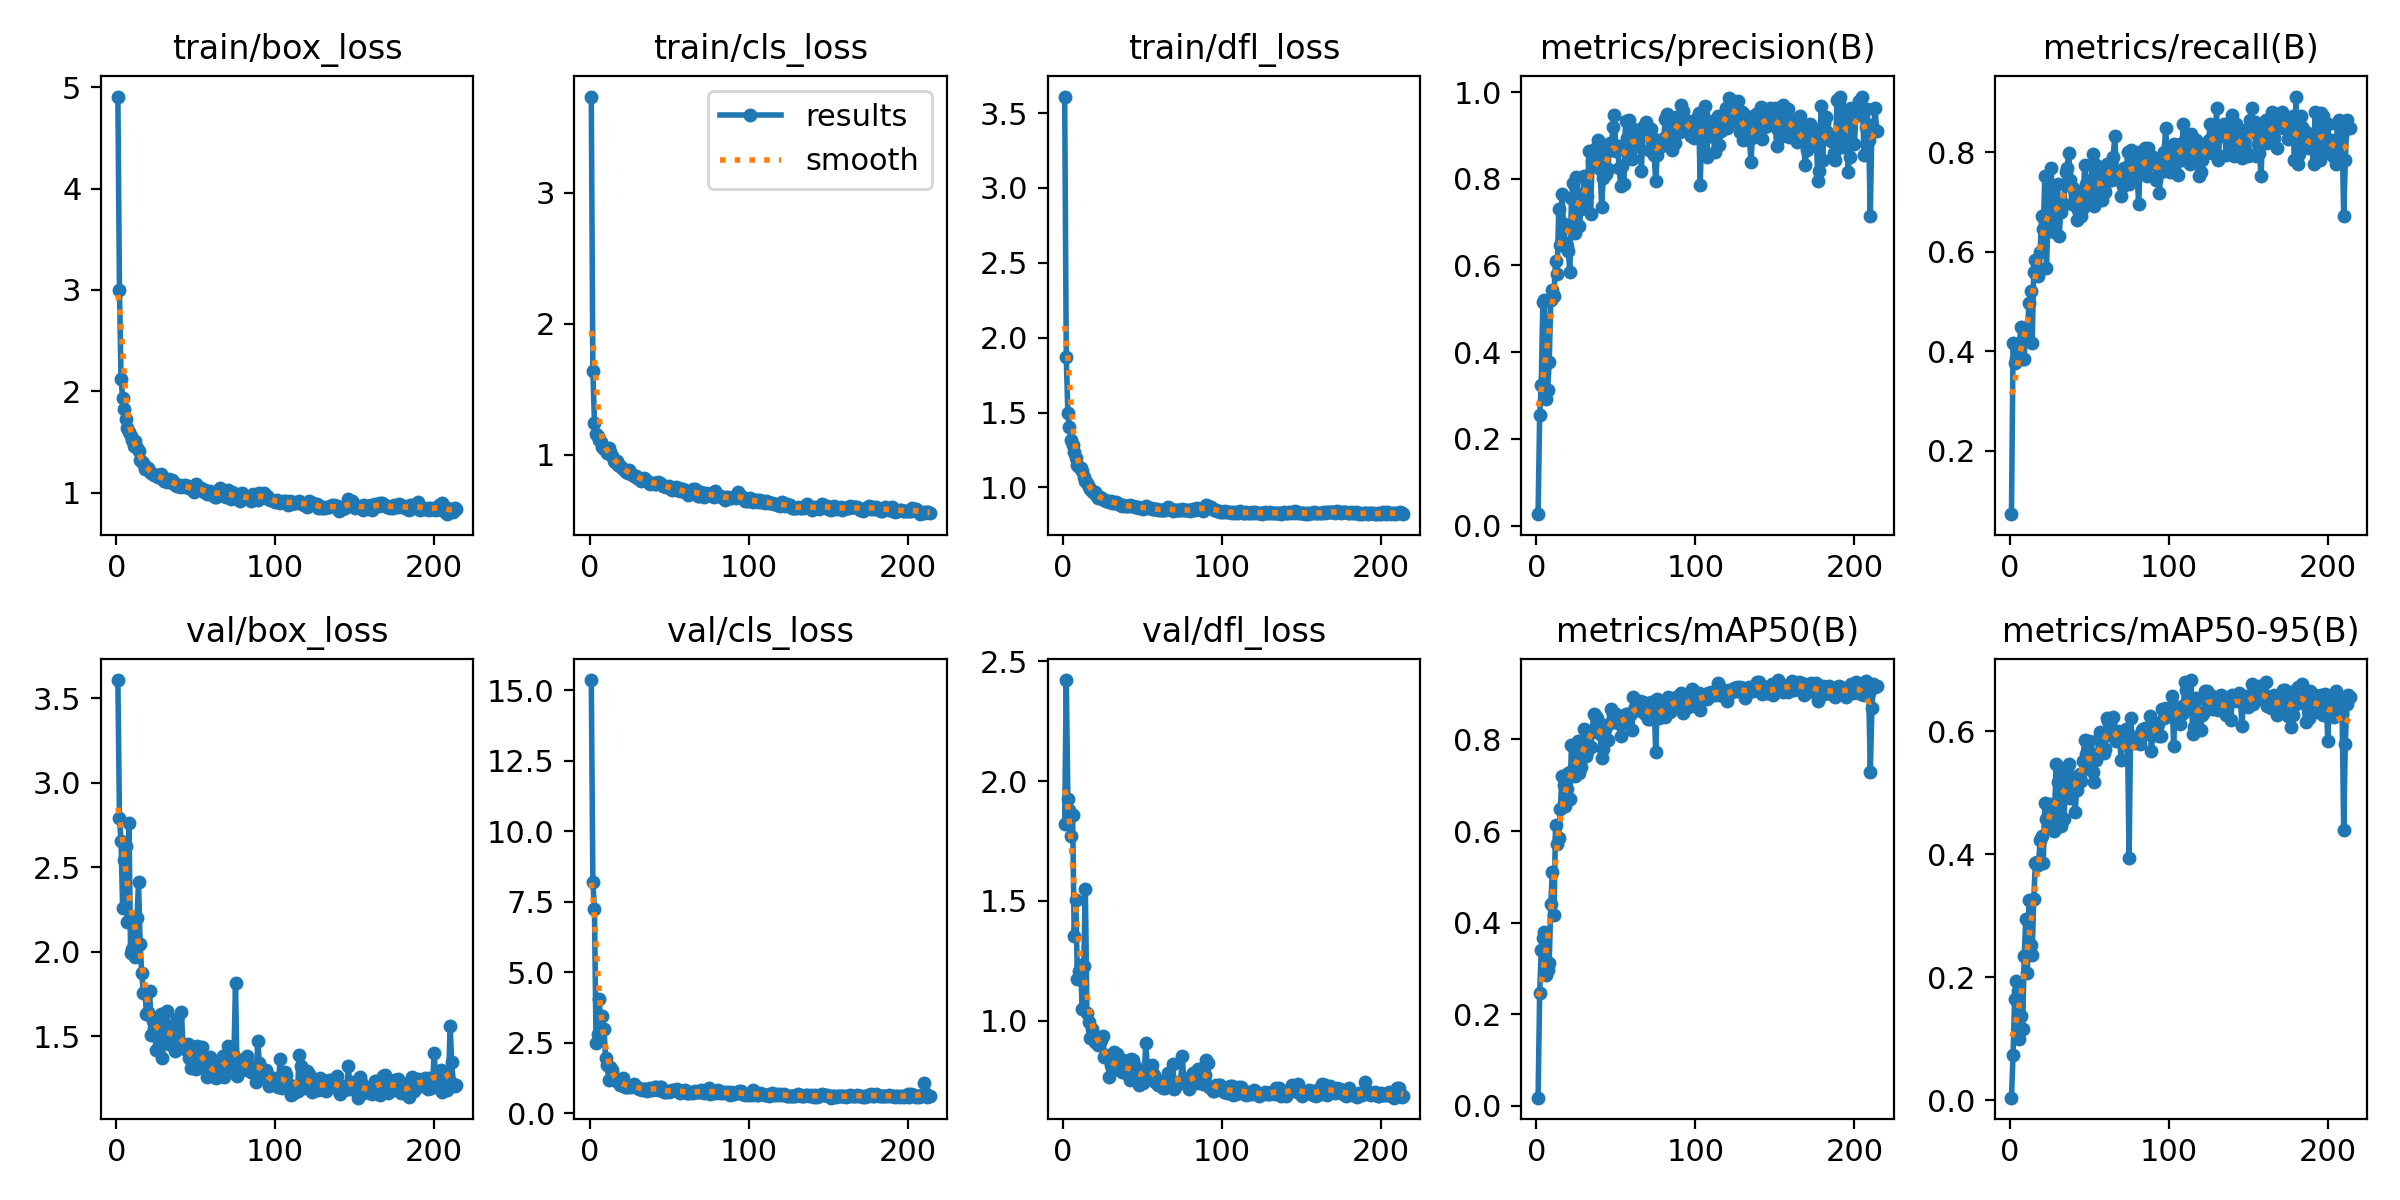

In [8]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

## 4.1 Visualize the Training Data

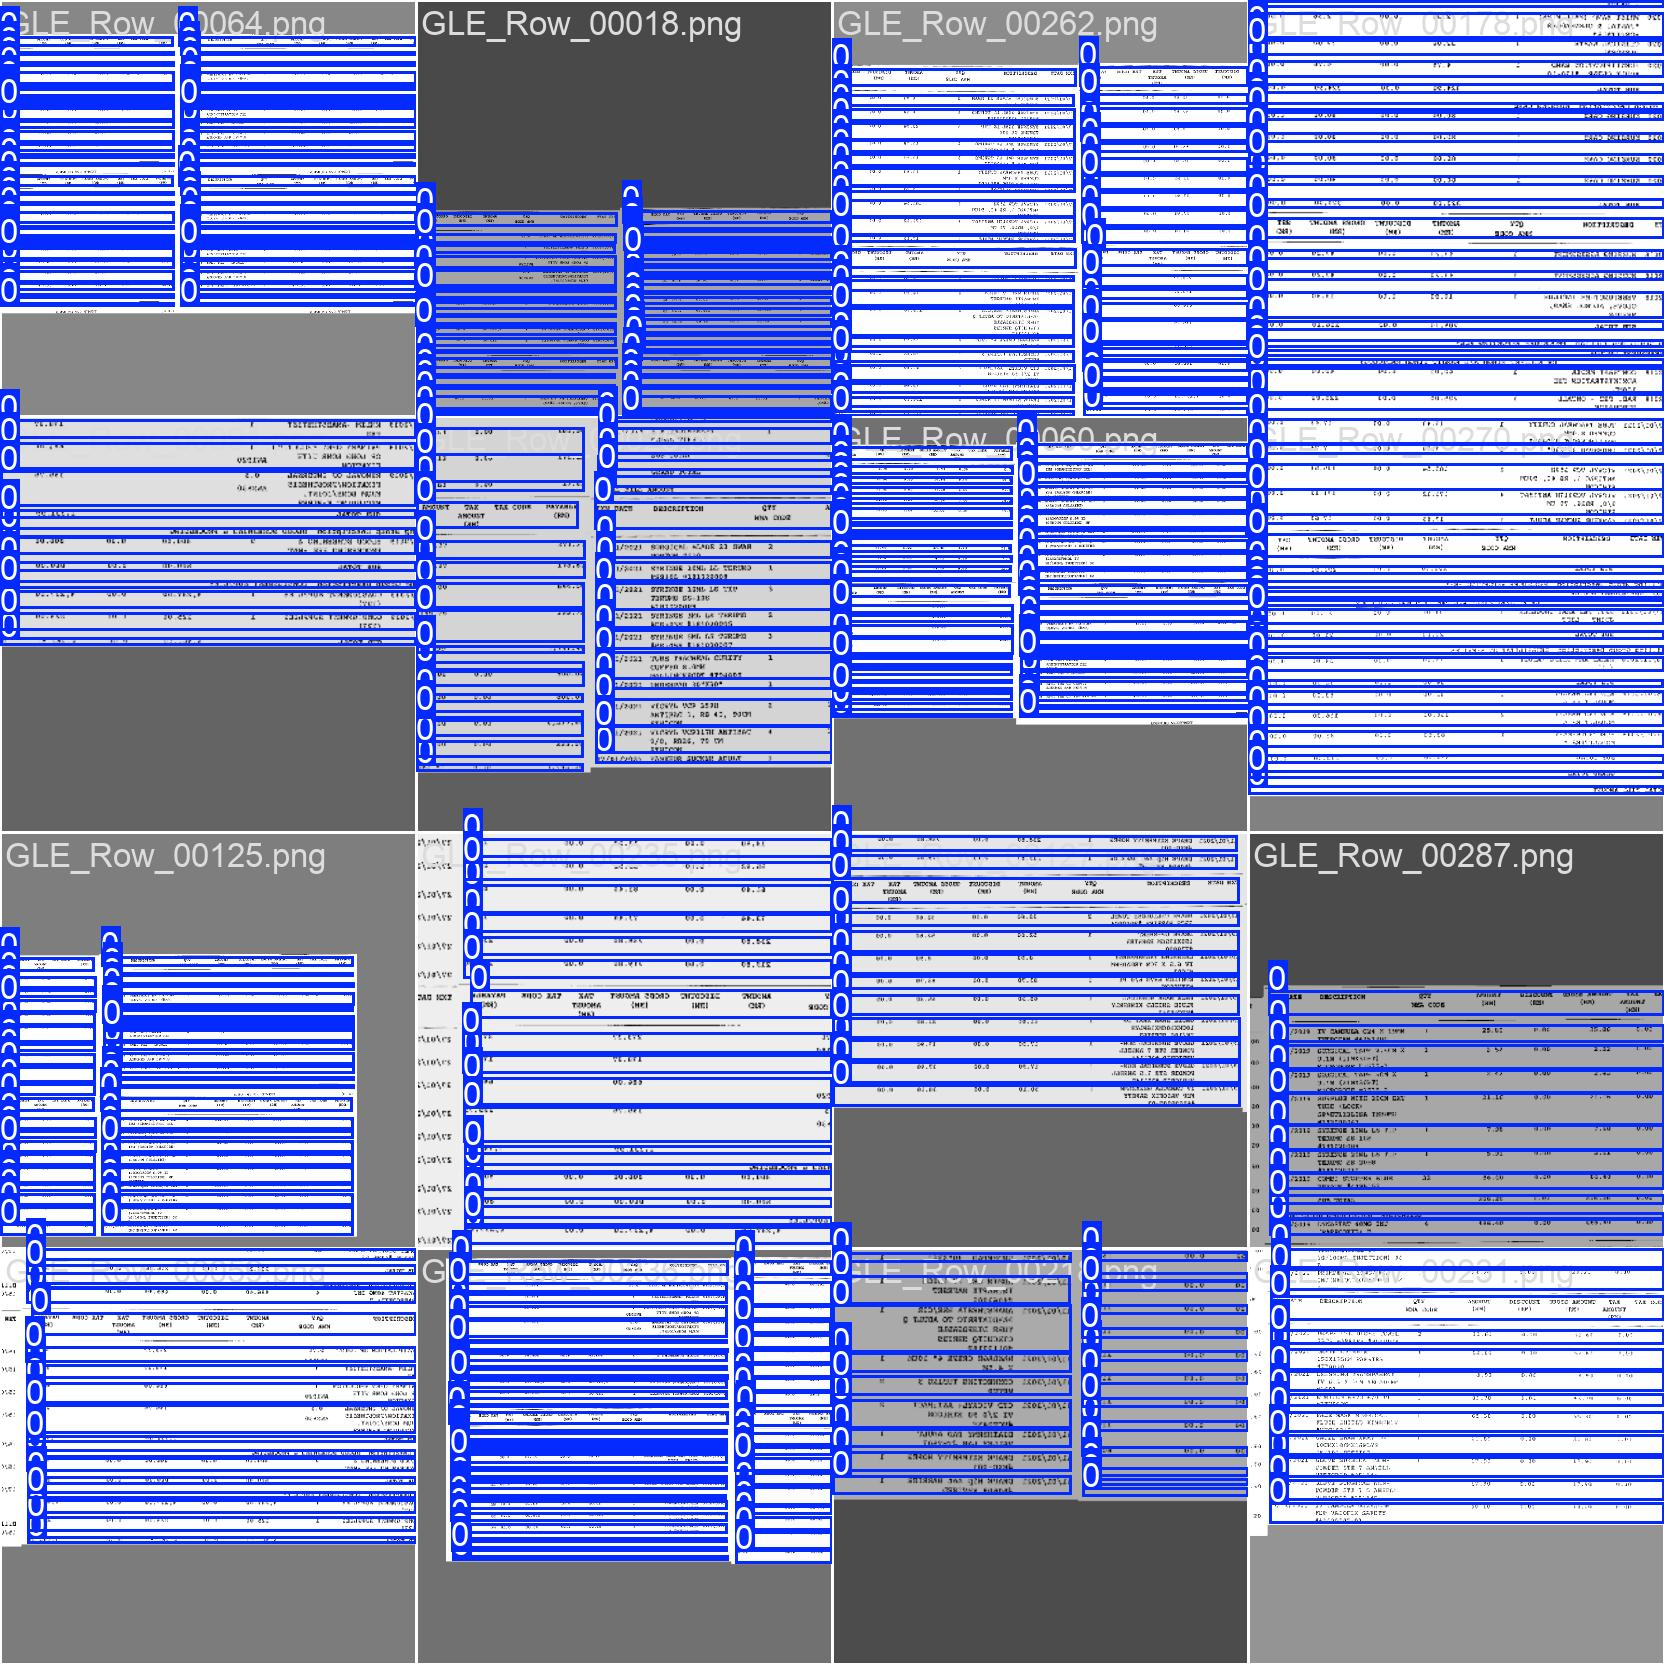

In [9]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

## 4.2 Visualize the Labels of Validating Data

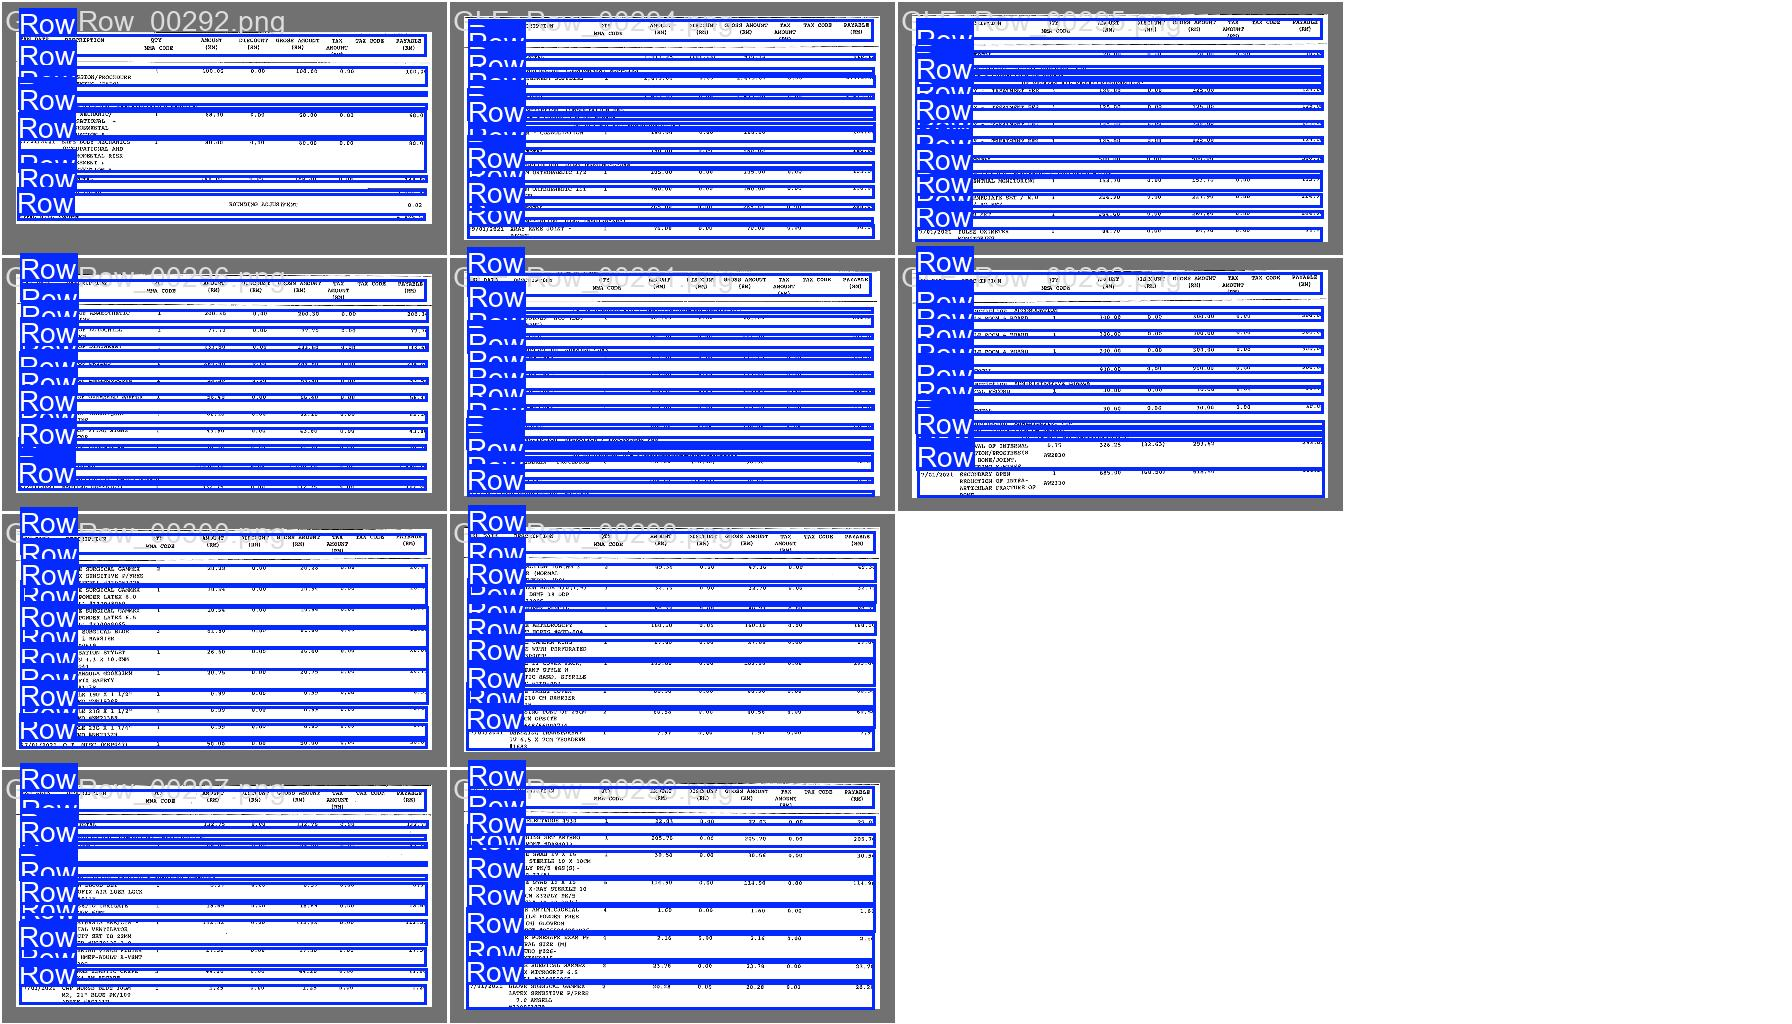

In [10]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

## 4.3 Visualize the Predicted Testing Data

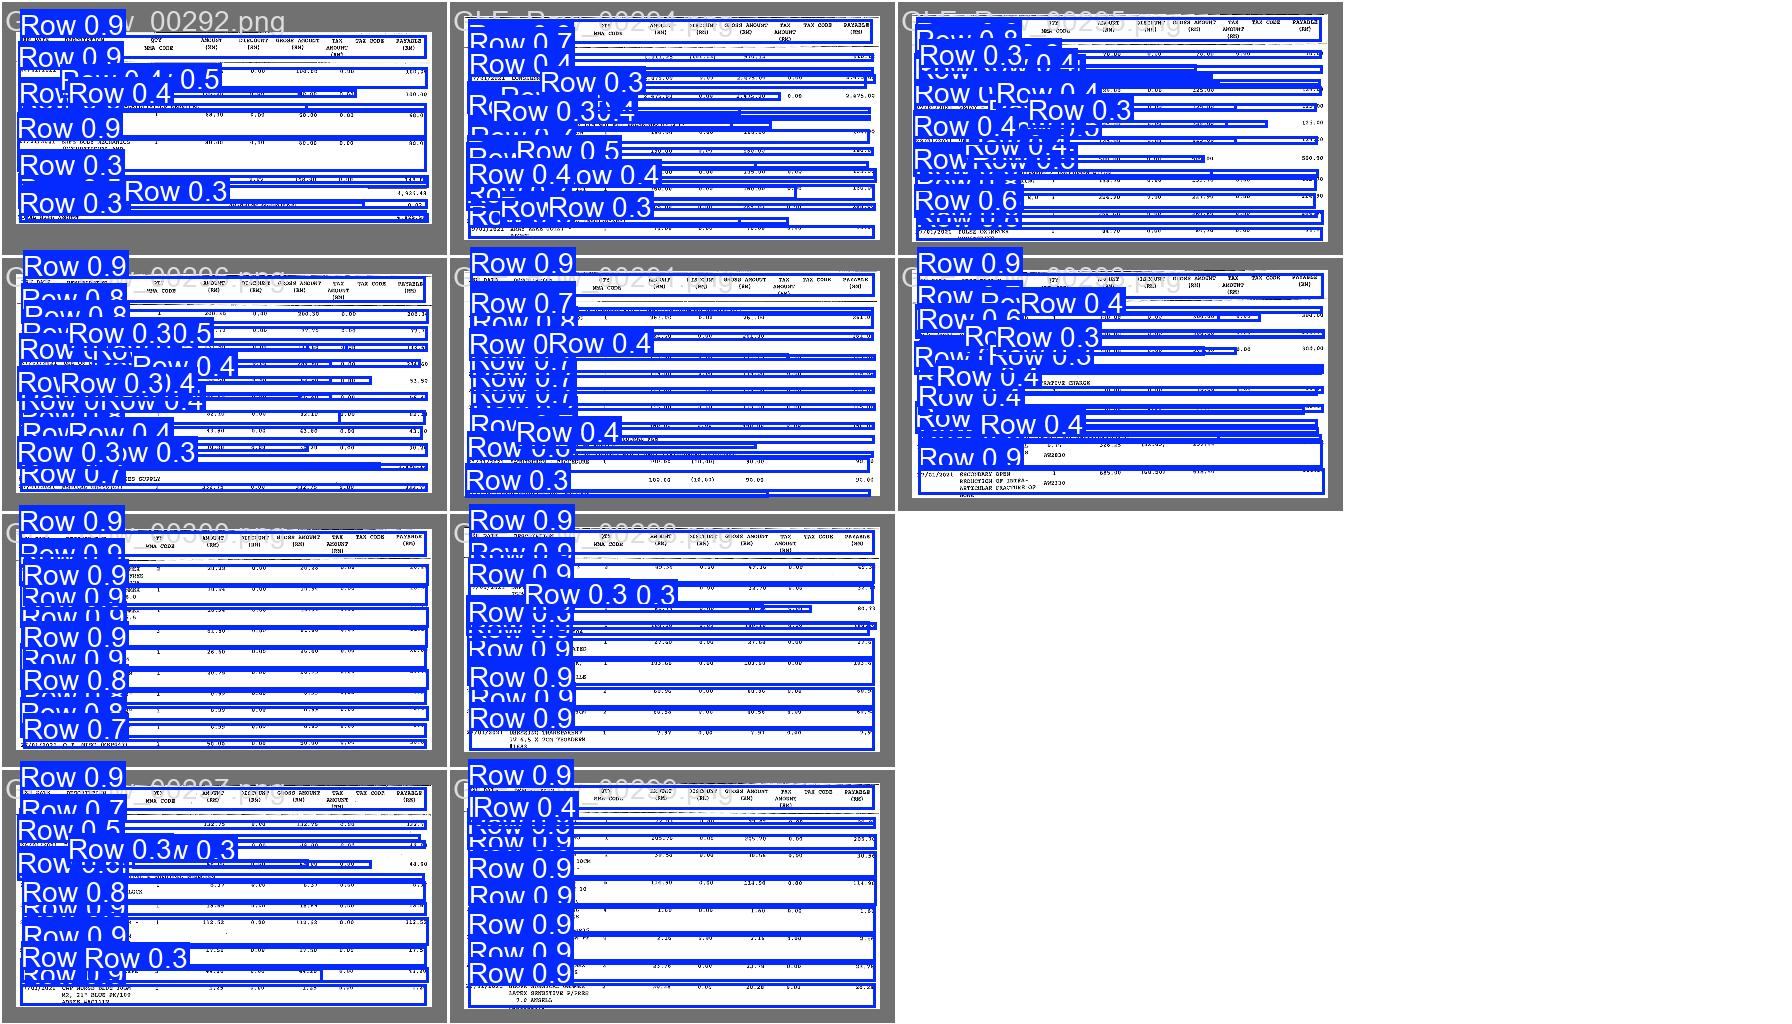

In [11]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [20]:
source = 'data/GLE_Row_test'
model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
# model = YOLO(f'runs/detect/train/weights/best.pt')

# model = YOLO('best.pt')

# deskewer = DataAugmentation.Deskew(source)
# deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416, iou=0.25, conf=0.3)


image 1/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00281.png: 256x416 12 Rows, 31.2ms
image 2/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00282.png: 224x416 13 Rows, 31.2ms
image 3/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00283.png: 224x416 14 Rows, 31.2ms
image 4/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00284.png: 128x416 7 Rows, 62.6ms
image 5/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00285.png: 224x416 14 Rows, 31.2ms
image 6/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00286.png: 256x416 16 Rows, 15.6ms
image 7/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00287.png: 224x416 13 Rows, 15.6ms
image 8/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00288.png: 224x416 12 Rows, 31.3ms
image 9/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_Row_test\GLE_Row_00289.png: 256x416 12 Rows, 46.4ms
image 10/44 C:\Users\CP1\Desktop\GLE-Billing\data\GLE_R

In [15]:
print(results.save_dir)

runs\detect\train
